##### Patient Experience Clustering

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('drugsComTrain_raw.csv')
test_data = pd.read_csv('drugsComTest_raw.csv')
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [3]:
train_data.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [5]:
train_data.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [6]:
train_data['condition'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
161292    False
161293    False
161294    False
161295    False
161296    False
Name: condition, Length: 161297, dtype: bool

In [7]:
# using clustering to fill the condition coulmn that are empty
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer


In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.head(4)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10


In [10]:
train_data.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160398 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   160398 non-null  int64  
 1   drugName     160398 non-null  object 
 2   condition    160398 non-null  object 
 3   review       160398 non-null  object 
 4   rating       160398 non-null  float64
 5   date         160398 non-null  object 
 6   usefulCount  160398 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 9.8+ MB


In [13]:
train_data.describe()

,Unnamed: 0,rating,usefulCount
count,160398.000000,160398.000000,160398.000000
mean,115957.147309,6.995923,28.097613
std,67015.899492,3.272303,36.457876
min,2.000000,1.000000,0.000000
25%,58065.250000,5.000000,6.000000
50%,115845.500000,8.000000,16.000000
75%,173826.750000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [14]:
train_data.shape

(160398, 7)

In [15]:
train_data.nunique()

Unnamed: 0     160398
drugName         3431
condition         884
review         112105
rating             10
date             3579
usefulCount       389
dtype: int64

Text(0.5, 1.0, 'Top genres')

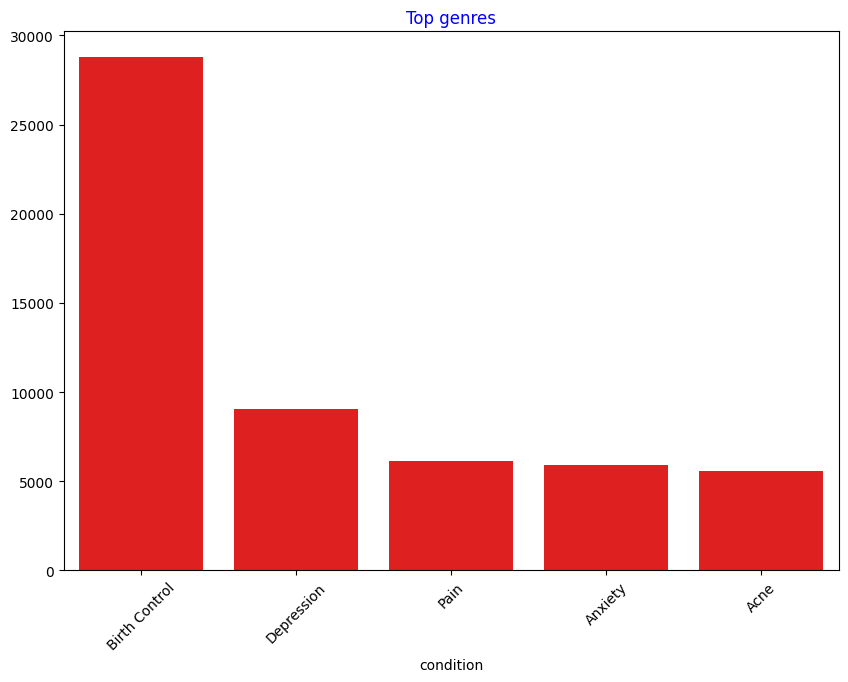

In [18]:
top = train_data['condition'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index, y=top[:5].values, color = 'red')
plt.xticks(rotation=45)
plt.title('Top genres', color = 'blue')

Text(0.5, 1.0, 'Top genres')

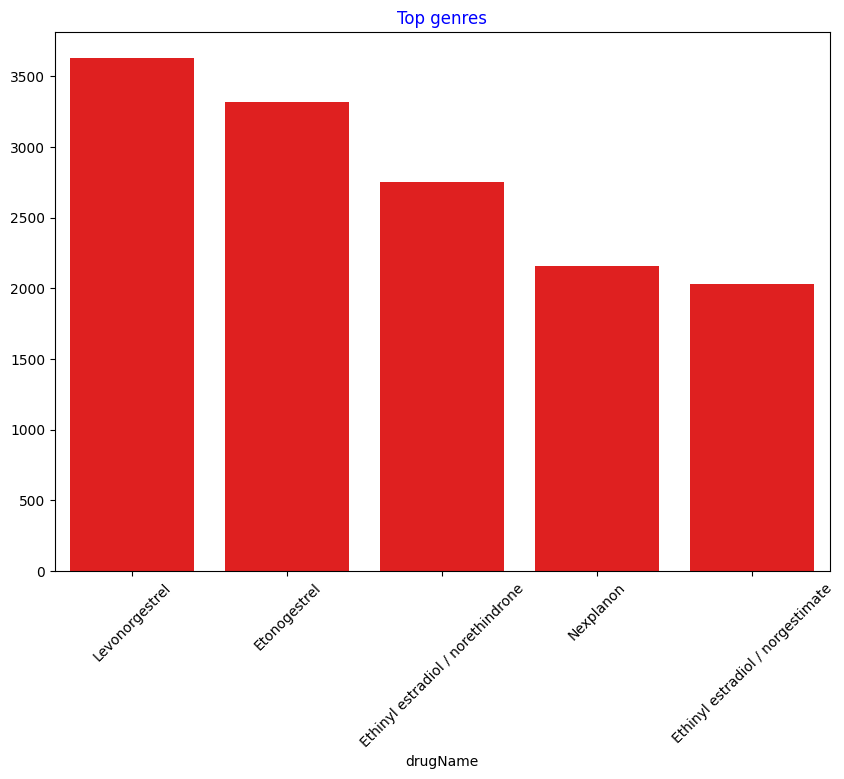

In [20]:
top = train_data['drugName'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index, y=top[:5].values, color = 'red')
plt.xticks(rotation=45)
plt.title('Top genres', color = 'blue')

In [21]:
train_data = train_data.drop(columns=['Unnamed: 0'])


In [22]:
train_data['date'] = pd.to_datetime(train_data['date'], errors='coerce')


In [23]:
train_data.head(10)

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37
5,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,2015-11-28,43
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,2017-03-07,5
7,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,2015-03-14,32
8,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,2016-08-09,11
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,2016-12-08,1


In [24]:
train_data = train_data.dropna(subset=['rating', 'condition', 'drugName'])


In [25]:
#clasifying ratings 

def classify_effectiveness(rating):
    if rating >=8:
        return 'Effective'
    elif 5<= rating <8:
        return "Moderately Effective"
    else:
        return 'Ineffective'
train_data['effectiveness'] = train_data['rating'].apply(classify_effectiveness)

In [26]:
train_data.head(10)

,drugName,condition,review,rating,date,usefulCount,effectiveness
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,Effective
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,Effective
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,Moderately Effective
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,Effective
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,Effective
5,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,2015-11-28,43,Ineffective
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,2017-03-07,5,Ineffective
7,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,2015-03-14,32,Effective
8,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,2016-08-09,11,Ineffective
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,2016-12-08,1,Effective


Clustering to recommend drugs 

In [31]:
from sklearn.preprocessing import StandardScaler
clustering_features = train_data[['rating']]
                                 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

In [32]:
from sklearn.cluster import KMeans

KMeans = KMeans(n_clusters = 5, random_state=42)
clusters = KMeans.fit_predict(scaled_features)

train_data['cluster_label'] = clusters

In [35]:
print(train_data.groupby('cluster_label')[['drugName', 'condition']].head(6))


                              drugName                     condition
0                            Valsartan  Left Ventricular Dysfunction
1                           Guanfacine                          ADHD
2                               Lybrel                 Birth Control
3                           Ortho Evra                 Birth Control
4             Buprenorphine / naloxone             Opiate Dependence
5                               Cialis  Benign Prostatic Hyperplasia
6                       Levonorgestrel       Emergency Contraception
7                         Aripiprazole               Bipolar Disorde
8                               Keppra                      Epilepsy
9   Ethinyl estradiol / levonorgestrel                 Birth Control
10                          Topiramate           Migraine Prevention
11                      L-methylfolate                    Depression
12                             Pentasa               Crohn's Disease
13                    Dextromethor

In [36]:
# Assuming `kmeans.labels_` contains cluster labels
train_data['cluster_label'] = KMeans.labels_


In [37]:
train_data.groupby('cluster_label')['condition'].value_counts().head(10)


cluster_label  condition              
0              Birth Control              10110
               Depression                  4297
               Anxiety                     3421
               Pain                        3415
               Acne                        3022
               Weight Loss                 2305
               Bipolar Disorde             2054
               Obesity                     2047
               Emergency Contraception     1838
               Insomnia                    1717
Name: count, dtype: int64

In [38]:
train_data.groupby(['cluster_label', 'condition', 'drugName'])['rating'].mean()


cluster_label  condition                                   drugName               
0              0</span> users found this comment helpful.  Chantix                     9.000000
                                                           Depo-Provera                9.200000
                                                           Drysol                     10.000000
                                                           Hypercare                   9.666667
                                                           Implanon                    9.666667
                                                                                        ...    
4              min / sitagliptin)                          Metformin / sitagliptin     3.750000
               min)                                        Linagliptin / metformin     3.000000
               moterol / mometasone)                       Formoterol / mometasone     4.000000
               moterol)                              

In [44]:
# Check common drugs and conditions per cluster
for cluster in train_data['cluster_label'].unique():
    print(f"\nCluster {cluster}:")
    cluster_data = train_data[train_data['cluster_label'] == cluster]
    print("Top conditions and drugs:")
    print(cluster_data.groupby(['condition', 'drugName']).size().nlargest(5))



Cluster 0:
Top conditions and drugs:
condition          drugName    
Contraception      Depo-Provera    1
Hyperhidrosis      Drysol          1
Smoking Cessation  Chantix         1
dtype: int64

Cluster 4:
Top conditions and drugs:
condition  drugName             
Asthma     Formoterol               1
Diabetes   Metformin/sitagliptin    1
dtype: int64


In [45]:
# Find the top-rated drugs for each condition in the cluster
top_rated_drugs = (
    train_data.groupby(['cluster_label', 'condition', 'drugName'])['rating']
    .mean()
    .reset_index()
    .sort_values(by=['cluster_label', 'rating'], ascending=False)
)

print(top_rated_drugs.head(10))


   cluster_label          condition               drugName  rating
3              4             Asthma             Formoterol    4.00
4              4           Diabetes  Metformin/sitagliptin    3.75
1              0      Hyperhidrosis                 Drysol   10.00
0              0      Contraception           Depo-Provera    9.20
2              0  Smoking Cessation                Chantix    9.00


Interpretation of Clusters
Cluster 0 Insights:
Top Conditions: Contraception, Hyperhidrosis, Smoking Cessation
Drugs in Cluster:
Depo-Provera: Used for contraception with a rating of 9.20.
Drysol: Used for hyperhidrosis (excessive sweating) with a perfect rating of 10.00.
Chantix: Used for smoking cessation, highly effective for users in this cluster.
Observation:
This cluster groups drugs that are well-rated for conditions related to lifestyle or preventive care. The ratings are notably high, suggesting that treatments in this group generally work well for patients.

Cluster 4 Insights:
Top Conditions: Asthma and Diabetes
Drugs in Cluster:
Formoterol: Used for asthma, with a lower rating of 4.00.
Metformin/Sitagliptin: A combination drug for managing diabetes, rated at 3.75.
Observation:
This cluster contains drugs targeting chronic health conditions. However, the lower ratings might indicate dissatisfaction or limited effectiveness among patients.

Overall Insights:
Cluster Differences: Cluster 0 focuses on well-received drugs for immediate or preventive conditions, while Cluster 4 contains drugs for chronic illnesses that may not be as highly rated by users.
Potential Recommendations:
Consider improving formulations or patient management strategies for chronic condition drugs in Cluster 4.
Drugs in Cluster 0 may already represent optimal treatment choices for their conditions based on user ratings.

In [46]:
def recommend_drugs(cluster_label, condition):
    cluster_data = train_data[
        (train_data['cluster_label'] == cluster_label) & 
        (train_data['condition'] == condition)
    ]
    
    recommended_drugs = (
        cluster_data.groupby('drugName')['rating']
        .mean()
        .sort_values(ascending=False)
        .head(3)
    )
    return recommended_drugs

# Example usage
print(recommend_drugs(0, "Birth Control"))


Series([], Name: rating, dtype: float64)


In [47]:
#'cluster_label' is the column from clustering
clustered_data = train_data[['drugName', 'condition', 'rating', 'cluster_label']]


In [48]:
# Group data by clusters and drugs
cluster_drug_ratings = clustered_data.groupby(['cluster_label', 'drugName'])['rating'].mean().reset_index()

# Sort within each cluster
top_drugs_per_cluster = cluster_drug_ratings.sort_values(['cluster_label', 'rating'], ascending=[True, False])


In [49]:
# Group data by clusters and conditions
cluster_condition_ratings = clustered_data.groupby(['cluster_label', 'condition'])['rating'].mean().reset_index()

# Sort within each cluster
top_conditions_per_cluster = cluster_condition_ratings.sort_values(['cluster_label', 'rating'], ascending=[True, False])


In [50]:
# Merge the top drugs and conditions by cluster
recommendations = pd.merge(
    top_drugs_per_cluster, 
    top_conditions_per_cluster, 
    on='cluster_label', 
    suffixes=('_drug', '_condition')
)

# Filter for highly rated drugs and conditions
recommendations = recommendations[recommendations['rating_drug'] > 8]


In [51]:
for cluster in recommendations['cluster_label'].unique():
    print(f"Cluster {cluster} Recommendations:")
    cluster_recs = recommendations[recommendations['cluster_label'] == cluster]
    for _, row in cluster_recs.iterrows():
        print(f"  Drug: {row['drugName']} - Condition: {row['condition']} - Drug Rating: {row['rating_drug']:.2f}")


Cluster 0 Recommendations:
  Drug: Drysol - Condition: Hyperhidrosis - Drug Rating: 10.00
  Drug: Drysol - Condition: Contraception - Drug Rating: 10.00
  Drug: Drysol - Condition: Smoking Cessation - Drug Rating: 10.00
  Drug: Depo-Provera - Condition: Hyperhidrosis - Drug Rating: 9.20
  Drug: Depo-Provera - Condition: Contraception - Drug Rating: 9.20
  Drug: Depo-Provera - Condition: Smoking Cessation - Drug Rating: 9.20
  Drug: Chantix - Condition: Hyperhidrosis - Drug Rating: 9.00
  Drug: Chantix - Condition: Contraception - Drug Rating: 9.00
  Drug: Chantix - Condition: Smoking Cessation - Drug Rating: 9.00


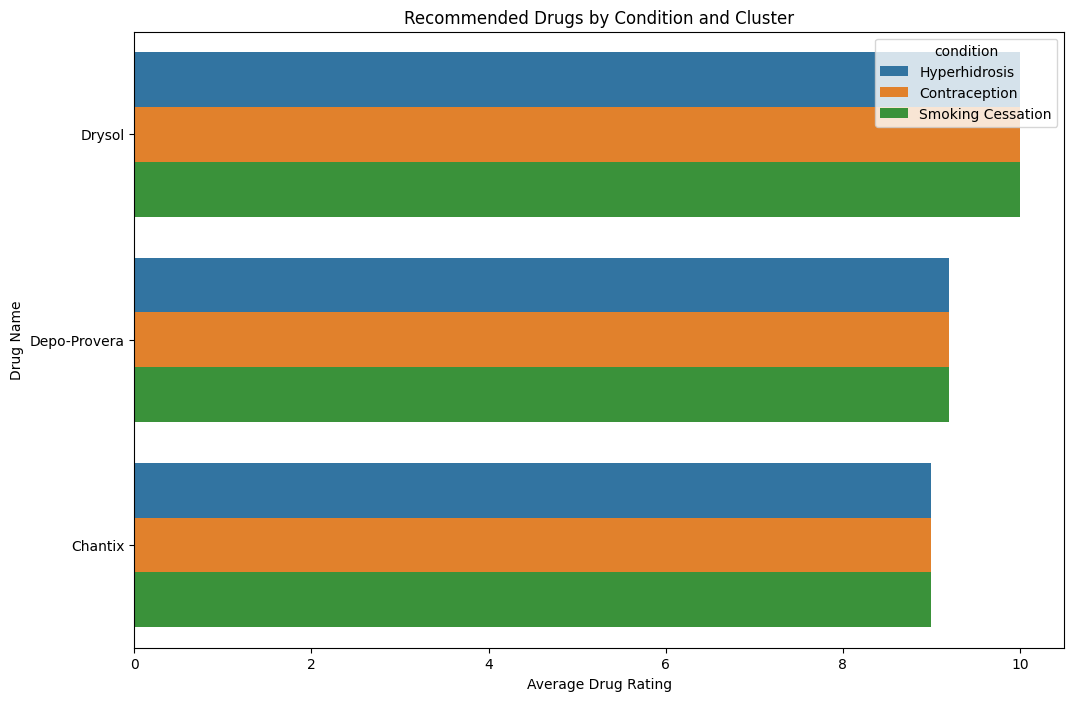

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(
    data=recommendations, 
    x='rating_drug', 
    y='drugName', 
    hue='condition'
)
plt.title('Recommended Drugs by Condition and Cluster')
plt.xlabel('Average Drug Rating')
plt.ylabel('Drug Name')
plt.show()
